# Experiments - Generation of Plots for Figures

This notebook uploads one or more "experiment_dict" files returned from the seperate notebook "03 - Experiments Pipeline Demonstration". It then aggregates the performance scores into a single meta experiment dict that is applied to generate the figures. There are supporting csv files "Experiment_keys.csv" and "Experiment_keys_rev2.csv" which are similar to the spreadsheet "04 - Experiment scenarios key.xlsx" provided seperately for reference.

This is the source of Figures 2-9 in the paper.

Please note that the plots shown below don't match the final paper versions as some additional repetitions were performed after completion of this demonstration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Automunge import *
am = AutoMunge()

import pickle
from copy import deepcopy
import statistics

Note that for next cell to run you'll need to enter your own filenames of experiment_dict reports to upload. These are the reports saved through application of training pipeline in seperate notebook "03 - Experiments Pipeline Demonstration". I believe for the plots to successfuly generate you'll need to have scores populated for each represented scenario (0-160, 300-320, and 380-400).

In [2]:

exp_dict_list = []

#the first upload serves as the initialized meta_dict
with open('infill_experiments_gpusetting1_399.pickle', 'rb') as handle:
  exp_dict = pickle.load(handle)
  #first dict serves as seed for meta_dict
  meta_dict = deepcopy(exp_dict)
#   exp_dict_list.append(first_dict)
  
  
#other uploads are appended to exp_dict_list
with open('infill_experiments_gpusetting2_399.pickle', 'rb') as handle:
  exp_dict = pickle.load(handle)
  #after that dicts are appended to exp_dict_list
  exp_dict_list.append(exp_dict)
  
#additional repetition results can be similarly added to figures by uploading as
# with open('infill_experiments_gpusetting2_399.pickle', 'rb') as handle:
#   exp_dict = pickle.load(handle)
#   #after that dicts are appended to exp_dict_list
#   exp_dict_list.append(exp_dict)

  
#the first batch are scenarios without NArw and other two are ML infill with NArw
all_experiments = \
list(range(1,160,1)) + \
list(range(300, 320, 1)) + \
list(range(380, 400, 1))


#we then aggregate the results of the various reports into the meta_dict
for experiment in all_experiments:
  
  for exp_dict in exp_dict_list:
    
    if 'score_log' in exp_dict[experiment]:
      
      if 'score_log' not in meta_dict[experiment]:
        meta_dict[experiment].update({'score_log' : exp_dict[experiment]['score_log']})
        
      #elif 'score_log' in meta_dict[experiment]:
      else:
        meta_dict[experiment]['score_log'] = \
        meta_dict[experiment]['score_log'] + \
        exp_dict[experiment]['score_log']

      meta_dict[experiment]['score'] = statistics.mean(meta_dict[experiment]['score_log'])
      meta_dict[experiment]['scorestdev'] = statistics.stdev(meta_dict[experiment]['score_log'])




In [6]:
experiments_dict = deepcopy(meta_dict)

#this access experiment keys csv prepared in google sheets

df_keys = pd.read_csv('Experiment_keys.csv')

#remove the IEEE scenarios since not completed yet

df_keys = df_keys.iloc[:160]

# df_keys.shape

# df_keys.head()

#this uses those kleys to access scores and returns df_values

df_values = df_keys.copy()

for column in ['ratio 0', 'ratio 0.1', 'ratio 0.33', 'ratio 0.66', 'ratio 1']:
  
  df_values[column] = df_values[column].astype(float)
  
  for row in range(32):
    df_values[column][row] = experiments_dict[df_values[column][row]]['score']
    
df_values.head()

<ipython-input-6-0e79735e6042>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_values[column][row] = experiments_dict[df_values[column][row]]['score']


,index,data set,target column,missing data type,infill type,ratio 0,ratio 0.1,ratio 0.33,ratio 0.66,ratio 1
0,0,Boston Housing,numeric target,missingatrandom,stndrdinfill,27328.199215,27615.759522,28090.840294,27633.279471,28540.210512
1,1,Boston Housing,numeric target,missingatrandom,adjinfill,28236.977917,28158.935729,28313.740950,28134.982925,27787.813711
2,2,Boston Housing,numeric target,missingatrandom,modeinfill,27184.217238,28131.357594,28367.133612,28254.316112,27827.064128
3,3,Boston Housing,numeric target,missingatrandom,MLinfill,27655.843516,26807.216401,27358.150066,27722.301341,28321.432642
4,4,Boston Housing,numeric target,numeric,stndrdinfill,27326.358042,26979.700458,27717.197935,28486.927116,28804.044657


This generates figures based on experiment scenarios 0-160, which correspond to Figures 2-5 in the paper.

<ipython-input-7-ef11f1728332>:86: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-ef11f1728332>:86: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-ef11f1728332>:86: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-ef11f1728332>:86: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


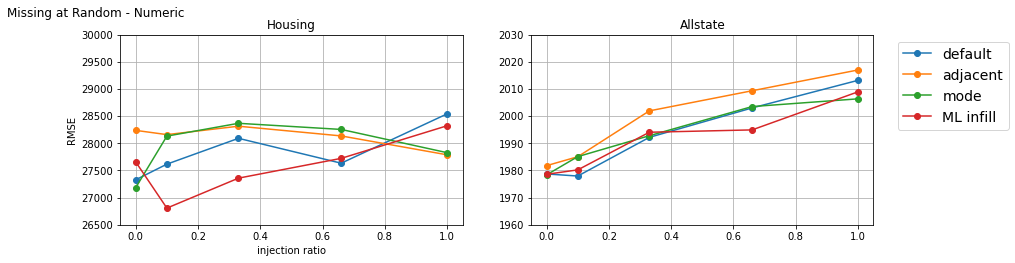

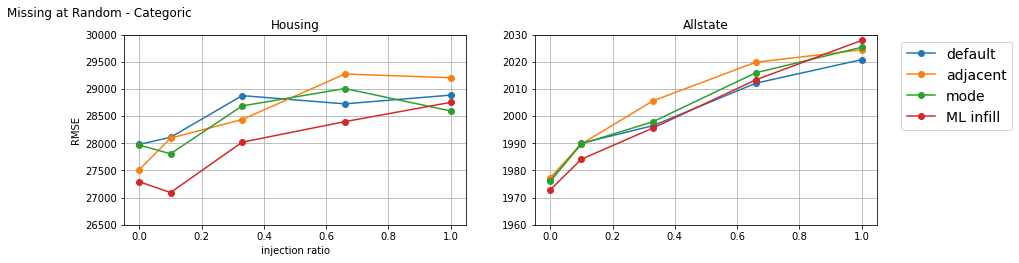

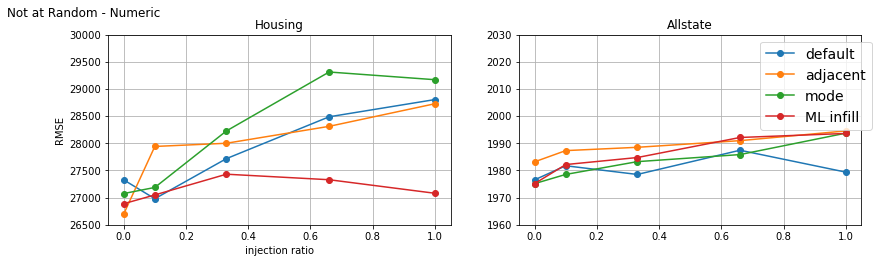

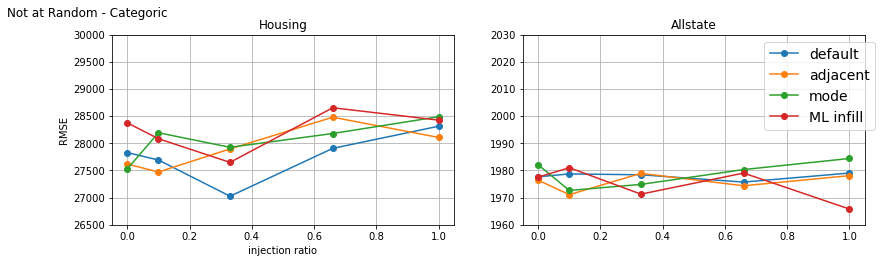

In [7]:
experiments_titles = \
{'Missing at Random - Numeric' : 0,
 'Missing at Random - Categoric' : 8,
 'Not at Random - Numeric' : 4,
 'Not at Random - Categoric' : 12,
}

for experiment_title in experiments_titles:
  
#   SMALL_SIZE = 10
#   MEDIUM_SIZE = 12
#   BIGGER_SIZE = 14
#   BIGGEST_SIZE = 20

#   plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#   plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#   plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
#   plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#   plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#   plt.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
#   plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
  
  title = experiment_title
  i = experiments_titles[experiment_title]
  
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13.5, 3.5))

#   i = 0

  labels = ['default', 'adjacent', 'mode', 'ML infill']

  targetcolumns = ['ratio 0', 'ratio 0.1', 'ratio 0.33', 'ratio 0.66', 'ratio 1']

  axes[0].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i:i+1].to_numpy().ravel(), label = labels[0], marker='o')
  axes[0].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+1:i+2].to_numpy().ravel(), label = labels[1], marker='o')
  axes[0].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+2:i+3].to_numpy().ravel(), label = labels[2], marker='o')
  axes[0].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+3:i+4].to_numpy().ravel(), label = labels[3], marker='o')

  axes[1].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+16:i+17].to_numpy().ravel(), label = labels[0], marker='o')
  axes[1].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+17:i+18].to_numpy().ravel(), label = labels[1], marker='o')
  axes[1].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+18:i+19].to_numpy().ravel(), label = labels[2], marker='o')
  axes[1].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+19:i+20].to_numpy().ravel(), label = labels[3], marker='o')

#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+32:i+33].to_numpy().ravel(), label = labels[0], marker='o')
#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+33:i+34].to_numpy().ravel(), label = labels[1], marker='o')
#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+34:i+35].to_numpy().ravel(), label = labels[2], marker='o')
#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+35:i+36].to_numpy().ravel(), label = labels[3], marker='o')

  #we'll just redundantly show ALlstate for formatting purposes
#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+16:i+17].to_numpy().ravel(), label = labels[0], marker='o')
#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+17:i+18].to_numpy().ravel(), label = labels[1], marker='o')
#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+18:i+19].to_numpy().ravel(), label = labels[2], marker='o')
#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+19:i+20].to_numpy().ravel(), label = labels[3], marker='o')


  # axes[0].legend(loc="best")
  # axes[0].set_xlabel('injection ratio')
  axes[0].set_ylabel('RMSE')
  axes[0].set_title('Housing')
  axes[0].grid(True)
  axes[0].set_xlabel('injection ratio')
  axes[0].set_ylim([26500,30000])

  # axes[1].legend(loc="best")
#   axes[1].set_xlabel('injection ratio')
  # axes[1].set_ylabel('model performance')
  axes[1].set_title('Allstate')
  axes[1].grid(True)
  axes[1].legend(loc="best", prop={'size': 14}, bbox_to_anchor=(1.05, 1))
  axes[1].set_ylim([1960,2030])
  
  
#   axes[2].legend(loc="best", prop={'size': 10}, bbox_to_anchor=(1.05, 1))
#   # axes[2].set_xlabel('injection ratio')
#   # axes[2].set_ylabel('model performance')
#   axes[2].set_title('IEEE')
#   axes[2].grid(True)

  fig.suptitle(title, x=0.1, y=.99)
  
  filename = title + '_0521' + '.png'
  
#   # plt.savefig("test.png")
#   plt.savefig(filename, bbox_inches='tight')

  fig.show()

## NArw

In [10]:
# df_keys_NArw = df_keys_NArw.iloc[[51, 55, 59, 63, 67, 71, 75, 79]]
df_keys_NArw = pd.read_csv('Experiment_keys_rev2.csv')
df_keys_NArw = df_keys_NArw.iloc[[51, 55, 59, 63, 67, 71, 75, 79]]
df_keys_NArw

,index,data set,target column,missing data type,infill type,NArw,ratio 0,ratio 0.1,ratio 0.33,ratio 0.66,ratio 1
51,51,Boston Housing,numeric target,missingatrandom,MLinfill,True,300,301,302,303,304
55,55,Boston Housing,numeric target,numeric,MLinfill,True,305,306,307,308,309
59,59,Boston Housing,categoric target,missingatrandom,MLinfill,True,310,311,312,313,314
63,63,Boston Housing,categoric target,categoric,MLinfill,True,315,316,317,318,319
67,67,Allstate,numeric target,missingatrandom,MLinfill,True,380,381,382,383,384
71,71,Allstate,numeric target,numeric,MLinfill,True,385,386,387,388,389
75,75,Allstate,categoric target,missingatrandom,MLinfill,True,390,391,392,393,394
79,79,Allstate,categoric target,categoric,MLinfill,True,395,396,397,398,399


In [11]:
#this access experiment keys csv prepared in google sheets

df_keys_NArw = pd.read_csv('Experiment_keys_rev2.csv')

# df_keys_NArw

#remove the IEEE scenarios since not completed yet

# df_keys_NArw = df_keys_NArw.iloc[48:80]
df_keys_NArw = df_keys_NArw.iloc[[51, 55, 59, 63, 67, 71, 75, 79]]

# df_keys.shape

# df_keys.head()

#this uses those kleys to access scores and returns df_values

df_values_NArw = df_keys_NArw.copy()

for column in ['ratio 0', 'ratio 0.1', 'ratio 0.33', 'ratio 0.66', 'ratio 1']:
  
  df_values_NArw[column] = df_values_NArw[column].astype(float)
  
#   for row in range(48, 80):
  for row in [51, 55, 59, 63, 67, 71, 75, 79]:
#   for row in range(32):
    df_values_NArw[column][row] = experiments_dict[df_values_NArw[column][row]]['score']
    
df_values_NArw

<ipython-input-11-160ef2c37567>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_values_NArw[column][row] = experiments_dict[df_values_NArw[column][row]]['score']


,index,data set,target column,missing data type,infill type,NArw,ratio 0,ratio 0.1,ratio 0.33,ratio 0.66,ratio 1
51,51,Boston Housing,numeric target,missingatrandom,MLinfill,True,27347.635378,27172.809798,26865.548307,27292.485283,28427.225209
55,55,Boston Housing,numeric target,numeric,MLinfill,True,27144.238642,26825.380086,26989.524306,26463.454002,26871.942783
59,59,Boston Housing,categoric target,missingatrandom,MLinfill,True,27899.395011,28184.478215,28452.462345,28619.752034,28583.679257
63,63,Boston Housing,categoric target,categoric,MLinfill,True,27320.926107,27649.883916,27672.943885,27661.400069,28261.188342
67,67,Allstate,numeric target,missingatrandom,MLinfill,True,1974.202310,1979.463621,1993.488584,2003.719246,2012.964049
71,71,Allstate,numeric target,numeric,MLinfill,True,1974.483295,1983.478215,1984.793542,1981.021360,1985.834837
75,75,Allstate,categoric target,missingatrandom,MLinfill,True,1980.921549,1987.310194,1994.522963,2003.686146,2011.511869
79,79,Allstate,categoric target,categoric,MLinfill,True,1975.174484,1984.120845,1972.917930,1976.898262,1976.477398


## ML infill comparison with NArw

These figures weren't included in the paper, this is just a comparison of scenarios of ML infill with and without NArw, which are for scenarios 60-80, 140-160, 300-320, and 380-400. This information is redundant with the next set of figures generated below.

<ipython-input-12-d4eb4ce90dbb>:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-d4eb4ce90dbb>:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-d4eb4ce90dbb>:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-d4eb4ce90dbb>:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


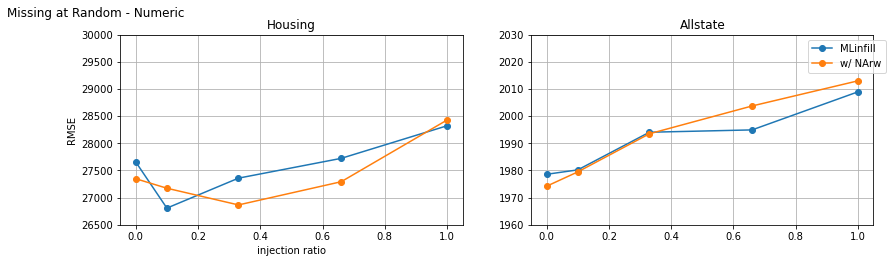

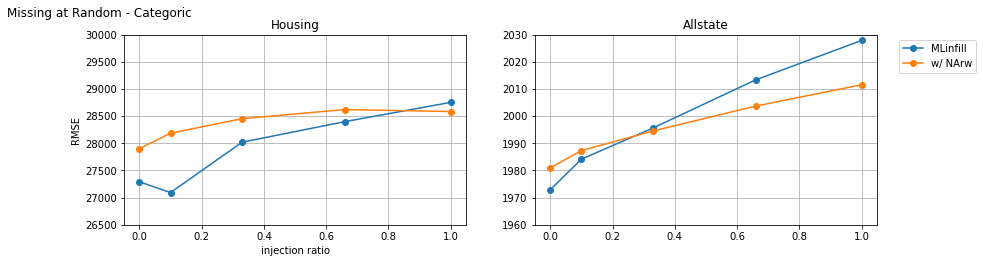

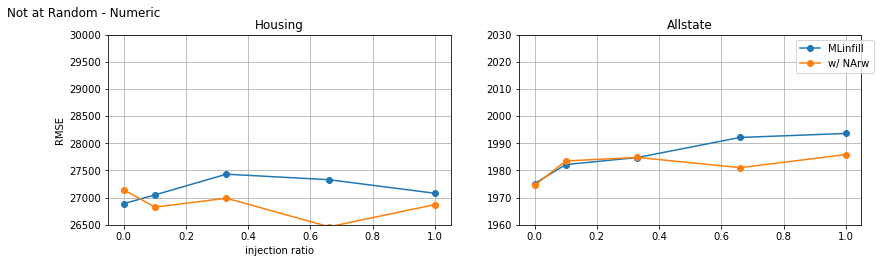

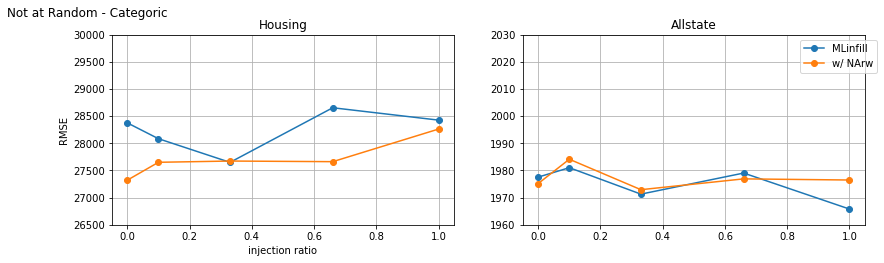

In [12]:
experiments_titles = \
{'Missing at Random - Numeric' : 0,
 'Missing at Random - Categoric' : 2,
 'Not at Random - Numeric' : 1,
 'Not at Random - Categoric' : 3,
}

df_values_subset = df_values.iloc[[3, 7, 11, 15, 19, 23, 27, 31]]

for experiment_title in experiments_titles:
  
  title = experiment_title
  i = experiments_titles[experiment_title]
  
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13.5, 3.5))
  
  labels = ['MLinfill', 'w/ NArw']
  
  targetcolumns = ['ratio 0', 'ratio 0.1', 'ratio 0.33', 'ratio 0.66', 'ratio 1']
  
  axes[0].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values_subset[targetcolumns][i:i+1].to_numpy().ravel(), label = labels[0], marker='o')
  axes[0].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values_NArw[targetcolumns][i:i+1].to_numpy().ravel(), label = labels[1], marker='o')
  
  axes[1].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values_subset[targetcolumns][i+4:i+5].to_numpy().ravel(), label = labels[0], marker='o')
  axes[1].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values_NArw[targetcolumns][i+4:i+5].to_numpy().ravel(), label = labels[1], marker='o')
  
  # axes[0].legend(loc="best")
  # axes[0].set_xlabel('injection ratio')
  axes[0].set_ylabel('RMSE')
  axes[0].set_title('Housing')
  axes[0].grid(True)
  axes[0].set_xlabel('injection ratio')
  axes[0].set_ylim([26500,30000])

  # axes[1].legend(loc="best")
#   axes[1].set_xlabel('injection ratio')
  # axes[1].set_ylabel('model performance')
  axes[1].set_title('Allstate')
  axes[1].grid(True)
  axes[1].legend(loc="best", prop={'size': 10}, bbox_to_anchor=(1.05, 1))
  axes[1].set_ylim([1960,2030])
  
#   axes[2].legend(loc="best", prop={'size': 10}, bbox_to_anchor=(1.05, 1))
#   # axes[2].set_xlabel('injection ratio')
#   # axes[2].set_ylabel('model performance')
#   axes[2].set_title('IEEE')
#   axes[2].grid(True)

  fig.suptitle(title, x=0.1, y=.99)
  
  filename = title + '_NArwcompare_0322' + '.png'
  
#   # plt.savefig("test.png")
#   plt.savefig(filename)

  fig.show()

In [13]:
df_values_subset = df_values.iloc[[3, 7, 11, 15, 19, 23, 27, 31]]
df_values_subset

,index,data set,target column,missing data type,infill type,ratio 0,ratio 0.1,ratio 0.33,ratio 0.66,ratio 1
3,3,Boston Housing,numeric target,missingatrandom,MLinfill,27655.843516,26807.216401,27358.150066,27722.301341,28321.432642
7,7,Boston Housing,numeric target,numeric,MLinfill,26888.010369,27049.310980,27430.776610,27329.129831,27079.776637
11,11,Boston Housing,categoric target,missingatrandom,MLinfill,27291.905440,27092.705397,28019.512725,28397.584270,28752.099751
15,15,Boston Housing,categoric target,categoric,MLinfill,28374.890325,28083.715555,27648.572028,28653.289844,28425.552800
19,19,Allstate,numeric target,missingatrandom,MLinfill,1978.585255,1980.204663,1994.054672,1994.913743,2008.913263
23,23,Allstate,numeric target,numeric,MLinfill,1975.154908,1982.161657,1984.749119,1992.129411,1993.604739
27,27,Allstate,categoric target,missingatrandom,MLinfill,1972.906298,1984.130258,1995.613488,2013.327265,2027.829771
31,31,Allstate,categoric target,categoric,MLinfill,1977.545118,1981.012729,1971.284855,1979.038256,1965.790264


In [14]:
df_keys_NArw

,index,data set,target column,missing data type,infill type,NArw,ratio 0,ratio 0.1,ratio 0.33,ratio 0.66,ratio 1
51,51,Boston Housing,numeric target,missingatrandom,MLinfill,True,300,301,302,303,304
55,55,Boston Housing,numeric target,numeric,MLinfill,True,305,306,307,308,309
59,59,Boston Housing,categoric target,missingatrandom,MLinfill,True,310,311,312,313,314
63,63,Boston Housing,categoric target,categoric,MLinfill,True,315,316,317,318,319
67,67,Allstate,numeric target,missingatrandom,MLinfill,True,380,381,382,383,384
71,71,Allstate,numeric target,numeric,MLinfill,True,385,386,387,388,389
75,75,Allstate,categoric target,missingatrandom,MLinfill,True,390,391,392,393,394
79,79,Allstate,categoric target,categoric,MLinfill,True,395,396,397,398,399


## full charts with NArw

These are the source of figures 5-9 in paper, and include scenarios 0-160, 300-320, and 380-400.

<ipython-input-16-7363eced6e4b>:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-16-7363eced6e4b>:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-16-7363eced6e4b>:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-16-7363eced6e4b>:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


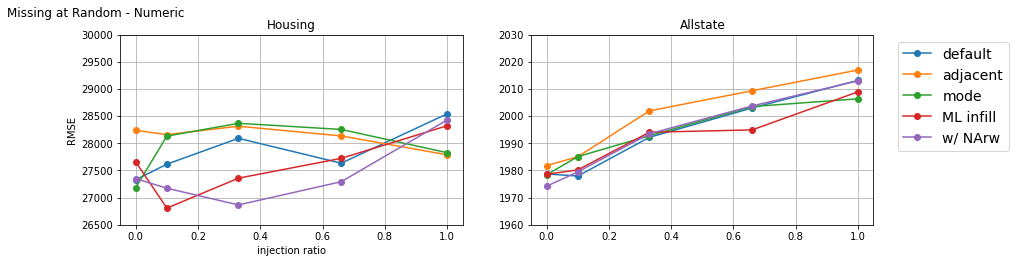

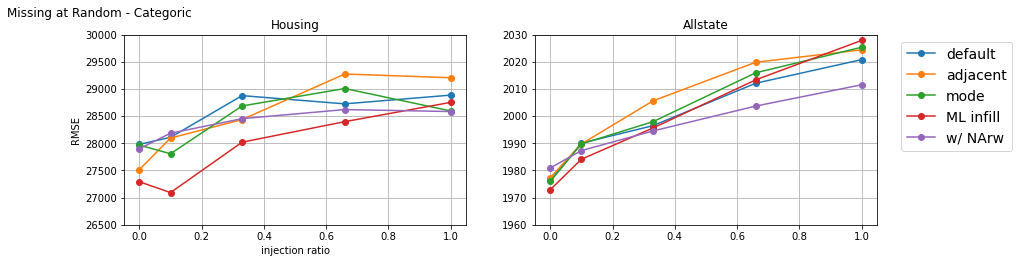

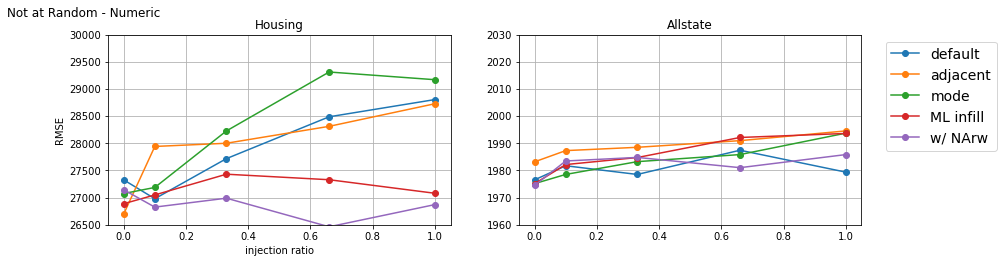

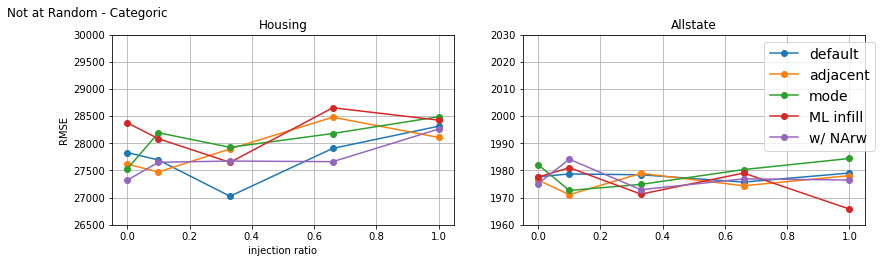

In [16]:
experiments_titles = \
{'Missing at Random - Numeric' : 0,
 'Missing at Random - Categoric' : 8,
 'Not at Random - Numeric' : 4,
 'Not at Random - Categoric' : 12,
}

for experiment_title in experiments_titles:
  
  title = experiment_title
  i = experiments_titles[experiment_title]
  
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13.5, 3.5))

#   i = 0

  labels = ['default', 'adjacent', 'mode', 'ML infill', 'w/ NArw']

  targetcolumns = ['ratio 0', 'ratio 0.1', 'ratio 0.33', 'ratio 0.66', 'ratio 1']
  
# linestyle or ls	{'-', '--', '-.', ':', '', (offset, on-off-seq), ...}

  axes[0].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i:i+1].to_numpy().ravel(), label = labels[0], marker='o')
  axes[0].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+1:i+2].to_numpy().ravel(), label = labels[1], marker='o')
  axes[0].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+2:i+3].to_numpy().ravel(), label = labels[2], marker='o')
  axes[0].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+3:i+4].to_numpy().ravel(), label = labels[3], marker='o')
  axes[0].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values_NArw[targetcolumns][int(i/4):int(i/4+1)].to_numpy().ravel(), label = labels[4], marker='o')

  axes[1].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+16:i+17].to_numpy().ravel(), label = labels[0], marker='o')
  axes[1].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+17:i+18].to_numpy().ravel(), label = labels[1], marker='o')
  axes[1].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+18:i+19].to_numpy().ravel(), label = labels[2], marker='o')
  axes[1].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+19:i+20].to_numpy().ravel(), label = labels[3], marker='o')
  axes[1].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values_NArw[targetcolumns][int(i/4 + 4):int(i/4 + 5)].to_numpy().ravel(), label = labels[4], marker='o')

#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+32:i+33].to_numpy().ravel(), label = labels[0], marker='o')
#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+33:i+34].to_numpy().ravel(), label = labels[1], marker='o')
#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+34:i+35].to_numpy().ravel(), label = labels[2], marker='o')
#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+35:i+36].to_numpy().ravel(), label = labels[3], marker='o')

  #we'll just redundantly show ALlstate for formatting purposes
#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+16:i+17].to_numpy().ravel(), label = labels[0], marker='o')
#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+17:i+18].to_numpy().ravel(), label = labels[1], marker='o')
#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+18:i+19].to_numpy().ravel(), label = labels[2], marker='o')
#   axes[2].plot(np.array([0.0, 0.1, 0.33, 0.66, 1.0]), df_values[targetcolumns][i+19:i+20].to_numpy().ravel(), label = labels[3], marker='o')


  # axes[0].legend(loc="best")
  # axes[0].set_xlabel('injection ratio')
  axes[0].set_ylabel('RMSE')
  axes[0].set_title('Housing')
  axes[0].grid(True)
  axes[0].set_xlabel('injection ratio')
  axes[0].set_ylim([26500,30000])

  # axes[1].legend(loc="best")
#   axes[1].set_xlabel('injection ratio')
  # axes[1].set_ylabel('model performance')
  axes[1].set_title('Allstate')
  axes[1].grid(True)
  axes[1].legend(loc="best", prop={'size': 14}, bbox_to_anchor=(1.05, 1))
  axes[1].set_ylim([1960,2030])
  
  
#   axes[2].legend(loc="best", prop={'size': 10}, bbox_to_anchor=(1.05, 1))
#   # axes[2].set_xlabel('injection ratio')
#   # axes[2].set_ylabel('model performance')
#   axes[2].set_title('IEEE')
#   axes[2].grid(True)

  fig.suptitle(title, x=0.1, y=.99)
  
  filename = title + '_NArw_0521' + '.png'
  
#   # plt.savefig("test.png")
#   plt.savefig(filename, bbox_inches='tight')

  fig.show()